# Implementing Linear Regression By Using MiniBatch Gradient Descent

In [1]:
#Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the data
df = pd.read_csv('data.csv')

In [3]:
#The first five rows from the data
df.head()

,days,length
0,1,0
1,5,1
2,14,2
3,22,5
4,44,29


In [4]:
#The information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   days    20 non-null     int64
 1   length  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [5]:
#Statastical description of the data
df.describe()

,days,length
count,20.000000,20.000000
mean,86.250000,362.550000
std,48.353822,254.952106
min,1.000000,0.000000
25%,52.250000,138.500000
50%,99.000000,435.000000
75%,120.000000,594.750000
max,150.000000,647.000000


In [6]:
#Inserting X0 into the data frame
df.insert(0,'X0',1)

In [7]:
df.head()

,X0,days,length
0,1,1,0
1,1,5,1
2,1,14,2
3,1,22,5
4,1,44,29


In [8]:
#Splitting the data to x and y
cols = df.shape[1]
x = df.iloc[:,0:cols-1]
y = df.iloc[:,cols-1:cols]


In [9]:
#Converting x,y into matrices
x = np.matrix(x.values)
y = np.matrix(y.values)

In [10]:
x

matrix([[  1,   1],
        [  1,   5],
        [  1,  14],
        [  1,  22],
        [  1,  44],
        [  1,  55],
        [  1,  72],
        [  1,  77],
        [  1,  85],
        [  1,  97],
        [  1, 101],
        [  1, 106],
        [  1, 113],
        [  1, 116],
        [  1, 119],
        [  1, 123],
        [  1, 133],
        [  1, 143],
        [  1, 149],
        [  1, 150]], dtype=int64)

In [11]:
y

matrix([[  0],
        [  1],
        [  2],
        [  5],
        [ 29],
        [300],
        [175],
        [200],
        [290],
        [400],
        [470],
        [500],
        [545],
        [560],
        [590],
        [609],
        [635],
        [647],
        [647],
        [646]], dtype=int64)

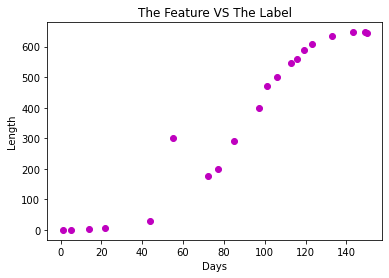

In [12]:
plt.scatter(df['days'],df['length'],c = 'm')
plt.title('The Feature VS The Label')
plt.xlabel('Days')
plt.ylabel('Length')
plt.show()

- In General there are a positive correlation between the feature and the label.
- There are an extream value in the data.

In [13]:
def cost_func(x,theta,y):
    '''
    This function for calculating the error between the actual and predicted values.
    INPUT:
    x: numpy.matrix. The feature.
    theta: numpy.matrix. The weights.
    y: numpy.matrix. The label.
    OUTPUT:
    The value of the error.
    '''
    return (1 / (2 * len(x))) * np.sum(np.power(((x * theta.T) - y),2))

In [14]:
def MBGD(x,theta,y,iterations = 1000,alpha = 0.001,batch = 5):
    '''
    This function for calculating the mini batch gradient descent.
    INPUT:
    x: numpy.matrix. The feature.
    theta: numpy.matrix. The initial weights.
    y: numpy.matrix. The label.
    iterations: int. The number of iterations.
    alpha: float. The learning rate.
    batch: int. The data batch.
    OUTPUT:
    The values of the thetas.
    '''
    tmp = np.matrix(np.zeros(theta.shape))
    length = x.shape[0]
    cost = []
    for itrs in range(iterations):
        cnt = 0
        for _ in range(length // batch):
            error_val = (x[cnt:cnt + batch] * theta.T) - y[cnt:cnt + batch]
            for idx in range(theta.shape[1]):
                tmp[0,idx] = theta[0,idx] - ((alpha /x.shape[0]) * np.sum(np.multiply(error_val,x[cnt:cnt + batch,idx])))
            theta = tmp
            cost.append(cost_func(x[cnt:cnt + batch],theta,y[cnt:cnt + batch]))
            cnt += batch
    return theta,cost

In [15]:
#Initializing theta
theta = np.matrix(np.array([5,6])) 
#The optimized theta
opt_theta,cost = MBGD(x,theta,y,iterations = 10000,alpha = 0.0001,batch = 5)

In [16]:
opt_theta

matrix([[-11.86610149,   4.59716423]])

In [17]:
#The first 5 values
cost[:5]

[8167.2995417038055,
 16145.31147371021,
 1870.418688723863,
 2157.661996257971,
 5325.559586009141]

In [18]:
#Predicted values
y_pred = x * opt_theta.T

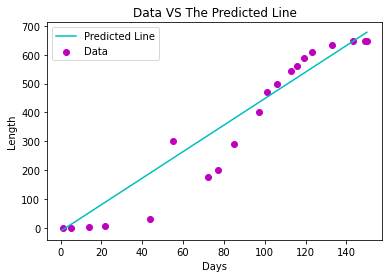

In [19]:
plt.scatter(df['days'],df['length'],label = 'Data',c = 'm')
plt.plot(df['days'],np.array(y_pred),label = 'Predicted Line',c = 'c')
plt.title('Data VS The Predicted Line')
plt.xlabel('Days')
plt.ylabel('Length')
plt.legend()
plt.show()

- From the above shape, it's a good line for these limited functions.